In [8]:
# -*- coding: utf-8 -*-

import pandas as pd
from shapely.geometry import Point, shape
import numpy as np

from flask import Flask
from flask import render_template
from flask import request

from scipy import signal

import json

import geopandas as gpd
import pickle

from pygam import PoissonGAM, s, te, f, GAM

from shapely.ops import cascaded_union

In [362]:
all_df = pd.read_csv('./input/raw_combined.csv')

In [363]:
fil = all_df[['daytime_density', 'daytime_pop', 'medinc', 
    'hs', 'phd', 'oldpop', 'youngpop', 'brewery','cafe','x','y','zone', 'hood']]

catenc = pd.factorize(fil['zone'])
fil['zone'] = catenc[0]

lat = fil['x']
lng = fil['y']
z = fil['cafe']

/Users/salix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [364]:
catenc

(array([ 0,  1,  0, ..., 30, 17, 30]),
 Index(['Downtown Office Core 1', 'Downtown Mixed Commercial',
        'Downtown Retail Core', 'Highrise', 'Neighborhood Commercial 3',
        'Downtown Office Core 2', 'Downtown Harborfront 2', 'Pike Market Mixed',
        'Residential Single Family 5000', 'General Industrial 1',
        'Commercial 2', 'Commercial 1', 'Lowrise 3', 'Midrise 1', 'Lowrise 2',
        'Neighborhood Commercial 1', 'Lowrise 1',
        'Residential Single Family 7200', 'Major Institution Overlay',
        'Industrial Buffer', 'Neighborhood Commercial 2',
        'General Industrial 2', 'Industrial Commercial',
        'Neighborhood Commercial 2 Incentive', 'Pioneer Square Mixed',
        'Master Planned Community', 'Downtown Harborfront 1',
        'International District Mixed', 'International District Residential',
        'Downtown Mixed Residential/Residential',
        'Residential Single Family 9600', 'Seattle Mixed', 'Midrise',
        'Seattle Mixed Residenti

In [365]:
i = ((lng - lng.min()) / 0.0023865).astype(int)
j = ((lat - lat.min()) / 0.0023865).astype(int)

grid[i,j] = z

In [366]:
grid = np.empty([100,83]) * 0 

grid[i,j] = z

kernel_1 = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]]) 

kernel_2 = np.array([[1,1,1,1,1],
                   [1,1,1,1,1],
                   [1,1,0,1,1],
                   [1,1,1,1,1],
                   [1,1,1,1,1]]) 

kernel_3 = np.array([[1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,0,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1]]) 

grid1 = signal.convolve2d(grid, kernel_1, boundary='wrap', mode='same')
grid2 = signal.convolve2d(grid, kernel_2, boundary='wrap', mode='same')
grid3 = signal.convolve2d(grid, kernel_3, boundary='wrap', mode='same')


In [367]:
fil['dist1'] = grid1[i,j]
fil['dist2'] = grid2[i,j]
fil['dist3'] = grid3[i,j]

/Users/salix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/salix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/salix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [386]:
fil = fil.fillna(0)
X = fil[['daytime_density', 'daytime_pop', 
         'medinc','hs', 
         'phd', 'oldpop', 
         'youngpop', 'brewery',
         'zone', 'dist1', 
         'dist2', 'dist3']].values
y = fil[['cafe']].values

array([[2.38206052e+04, 2.20590000e+04, 8.41530000e+04, ...,
        5.00000000e+00, 2.20000000e+01, 3.50000000e+01],
       [1.24691510e+05, 4.57250000e+04, 6.75000000e+04, ...,
        6.00000000e+00, 2.30000000e+01, 4.60000000e+01],
       [2.96320005e+04, 7.03600000e+03, 5.28780000e+04, ...,
        7.00000000e+00, 1.90000000e+01, 4.30000000e+01],
       ...,
       [2.34420739e+03, 4.95700000e+03, 1.55000000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.82619181e+03, 4.58300000e+03, 5.91930000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.55342894e+03, 3.31300000e+03, 6.15930000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00]])

In [249]:
gam = GAM(distribution='poisson', link='log')
gam.gridsearch(X, y)


100% (11 of 11) |########################| Elapsed Time: 0:00:06 Time:  0:00:06


GAM(callbacks=[Deviance(), Diffs()], distribution=PoissonDist(), 
   fit_intercept=True, link=LogLink(), max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + intercept,
   tol=0.0001, verbose=False)

In [263]:
fil['pred'] = gam.predict(X)

/Users/salix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


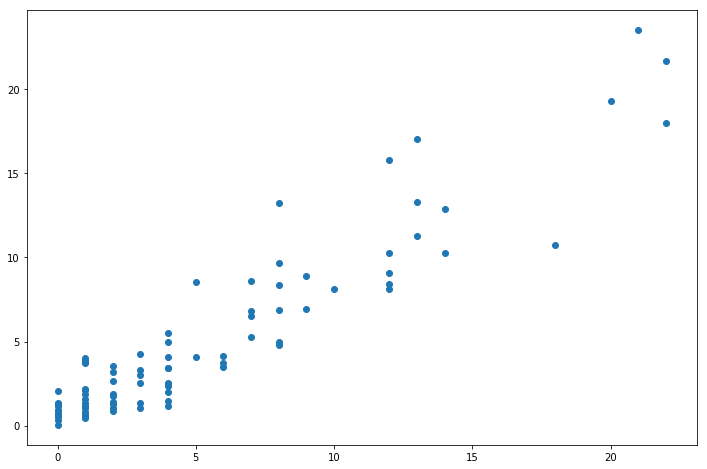

In [265]:
o_d = fil.groupby('hood')['cafe'].sum()
p_d = fil.groupby('hood')['pred'].sum()
plt.scatter(o_d,p_d)

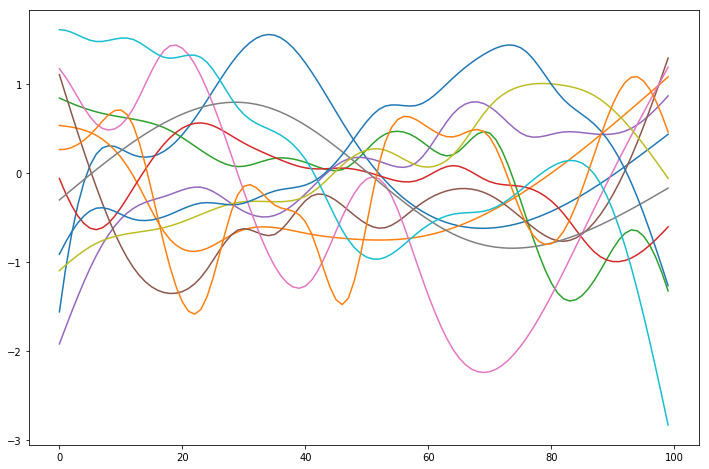

In [266]:
plt.figure()
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.plot(gam.partial_dependence(term=i))

In [387]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [388]:
gam = PoissonGAM(s(0) + s(1) + s(2) + s(3) + s(4) + te(5,6) + s(7) + f(8) + te(9, 10, 11)).fit(X, y)

In [37]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



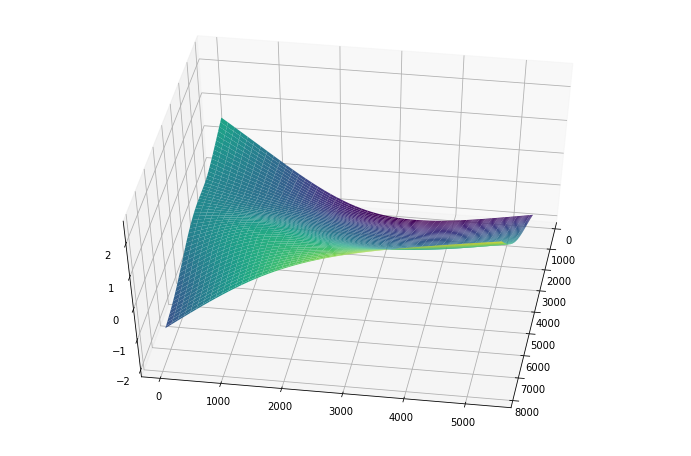

In [203]:

Z = gam.partial_dependence(term=5, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')
ax.view_init(50, angle)

In [246]:
gam.summary()

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     90.1315
Link Function:                          LogLink Log Likelihood:                                 -1098.3944
Number of Samples:                         4739 AIC:                                             2377.0518
                                                AICc:                                            2380.6654
                                                UBRE:                                                2.361
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4334
Feature Function                  Lam

<Figure size 864x576 with 0 Axes>

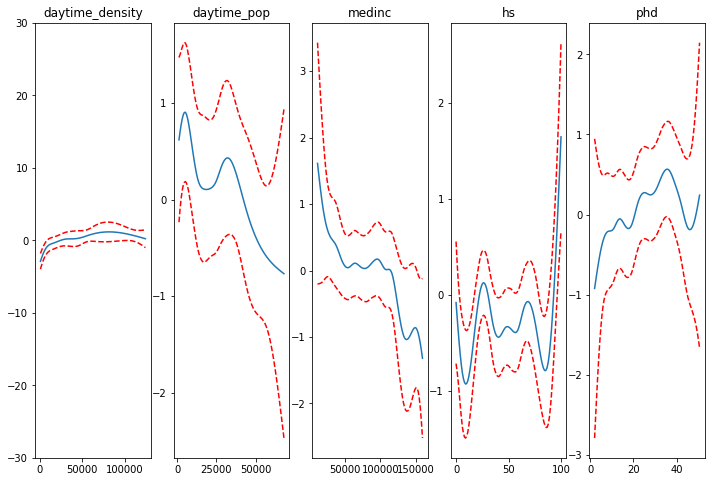

In [217]:

plt.figure();
fig, axs = plt.subplots(nrows=1,ncols=5);

titles = ['daytime_density', 'daytime_pop', 'medinc', 
            'hs', 'phd', 'oldpop', 
          'youngpop', 'brewery','dist1', 
          'dist2', 'dist3']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [267]:
import pickle

In [389]:
filename = 'finalized_model.sav'
with open(filename, 'wb') as file:  
    pickle.dump(gam, file)

In [390]:
filename = 'finalized_model.sav'
with open(filename, 'rb') as file:  
    pickle_model = pickle.load(file)

In [392]:
pickle_model.summary()

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                     92.4268
Link Function:                          LogLink Log Likelihood:                                 -1096.4529
Number of Samples:                         4739 AIC:                                             2377.7594
                                                AICc:                                            2381.5583
                                                UBRE:                                               2.3615
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4349
Feature Function                  Lam

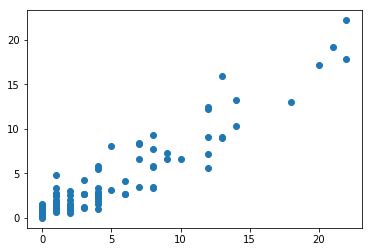

In [38]:
all_df = pd.read_csv('./input/raw_combined.csv')
filename = 'finalized_model.sav'
with open(filename, 'rb') as file:  
    pickle_model = pickle.load(file)
fil = all_df

kernel_1 = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]]) 

kernel_2 = np.array([[1,1,1,1,1],
                   [1,1,1,1,1],
                   [1,1,0,1,1],
                   [1,1,1,1,1],
                   [1,1,1,1,1]]) 

kernel_3 = np.array([[1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,0,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1]]) 

i = ((lng - lng.min()) / 0.0023865).astype(int)
j = ((lat - lat.min()) / 0.0023865).astype(int)

catenc = pd.factorize(fil['zone'])
fil['zone'] = catenc[0]

fil['dist1'] = 0 
fil['dist2'] = 0
fil['dist3'] = 0

X = fil[['daytime_density', 'daytime_pop', 
         'medinc','hs', 
         'phd', 'oldpop', 
         'youngpop', 'brewery',
        'zone', 'dist1', 'dist2', 'dist3']].values
y = fil[['cafe']].values

fil['pred'] = pickle_model.predict(X)
o_d = fil.groupby('hood')['cafe'].sum()
p_d = fil.groupby('hood')['pred'].sum()
plt.scatter(o_d,p_d)

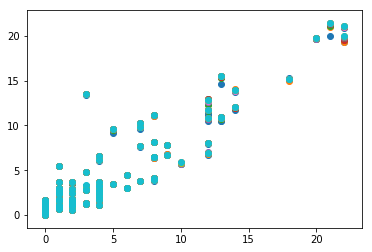

In [40]:
for x in range(10):
    grid[i,j] = fil['pred']

    grid1 = signal.convolve2d(grid, kernel_1, boundary='wrap', mode='same')
    grid2 = signal.convolve2d(grid, kernel_2, boundary='wrap', mode='same')
    grid3 = signal.convolve2d(grid, kernel_3, boundary='wrap', mode='same')

    fil['dist1'] = grid1[i,j]
    fil['dist2'] = grid2[i,j]
    fil['dist3'] = grid3[i,j]
    fil = fil.fillna(0)
    
    X = fil[['daytime_density', 'daytime_pop', 
             'medinc','hs', 
             'phd', 'oldpop', 
             'youngpop', 'brewery',
            'zone', 'dist1', 'dist2', 'dist3']].values
    y = fil[['cafe']].values

    fil['pred'] = pickle_model.predict(X)
    o_d = fil.groupby('hood')['cafe'].sum()
    p_d = fil.groupby('hood')['pred'].sum()
    plt.scatter(o_d,p_d)


In [42]:
all_df = pd.read_csv('./input/raw_combined.csv')
filename = 'finalized_model.sav'
with open(filename, 'rb') as file:  
    pickle_model = pickle.load(file)
fil = all_df

kernel_1 = np.array([[1,1,1],
                   [1,0,1],
                   [1,1,1]]) 

kernel_2 = np.array([[1,1,1,1,1],
                   [1,1,1,1,1],
                   [1,1,0,1,1],
                   [1,1,1,1,1],
                   [1,1,1,1,1]]) 

kernel_3 = np.array([[1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,0,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1],
                   [1,1,1,1,1,1,1]]) 

i = ((lng - lng.min()) / 0.0023865).astype(int)
j = ((lat - lat.min()) / 0.0023865).astype(int)

catenc = pd.factorize(fil['zone'])
fil['zone'] = catenc[0]

fil['dist1'] = 0 
fil['dist2'] = 0
fil['dist3'] = 0

X = fil[['daytime_density', 'daytime_pop', 
         'medinc','hs', 
         'phd', 'oldpop', 
         'youngpop', 'brewery',
        'zone', 'dist1', 'dist2', 'dist3']].values
y = fil[['cafe']].values

fil['pred'] = pickle_model.predict(X)

for x in range(10):
    grid[i,j] = fil['pred']

    grid1 = signal.convolve2d(grid, kernel_1, boundary='wrap', mode='same')
    grid2 = signal.convolve2d(grid, kernel_2, boundary='wrap', mode='same')
    grid3 = signal.convolve2d(grid, kernel_3, boundary='wrap', mode='same')

    fil['dist1'] = grid1[i,j]
    fil['dist2'] = grid2[i,j]
    fil['dist3'] = grid3[i,j]
    fil = fil.fillna(0)
    
    X = fil[['daytime_density', 'daytime_pop', 
             'medinc','hs', 
             'phd', 'oldpop', 
             'youngpop', 'brewery',
            'zone', 'dist1', 'dist2', 'dist3']].values
    y = fil[['cafe']].values

    fil['pred'] = pickle_model.predict(X)
    
all_df['change'] = fil['pred'] - all_df['cafe']
all_df['cafe'] = fil['pred']

o_d = fil.groupby('hood')['cafe'].sum()
p_d = fil.groupby('hood')['pred'].sum()

pred_df = pd.DataFrame(data = {
'daytime_density': all_df.groupby('hood')['daytime_density'].mean(),
'daytime_pop':all_df.groupby('hood')['daytime_pop'].mean(),
'medinc':all_df.groupby('hood')['medinc'].mean(),
'hs':all_df.groupby('hood')['hs'].mean(),
'phd':all_df.groupby('hood')['phd'].mean(),
'oldpop':all_df.groupby('hood')['oldpop'].mean(),
'youngpop':all_df.groupby('hood')['youngpop'].mean(),
'brewery':all_df.groupby('hood')['brewery'].sum().astype(int),
'cafe':all_df.groupby('hood')['cafe'].sum().astype(int),
'change':all_df.groupby('hood')['change'].sum().astype(int)
})

pred_df['hood'] = list(pred_df.index)
del pred_df.index.name

epsg_utm = 26910 #utm zone 10n
census = gpd.read_file('./input/neighborhoods.geojson')
census['hood'] = census['S_HOOD'].astype(str)
gdf = census.merge(pred_df, how='left', on='hood')